 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%">    Digital to Analog Converter - DAC </span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Digital to Analog Converter (DAC)```, ```Digital Signal Processing (DSP)```, ```Arduino```

# I. Introduction
<br>
<div class="title"style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

## <div style="color:#00a0e4"> 1. Background </div>

Digital systems often need to produce an effect in the physical world, in the form of continuous time-varying quantities. Such goal can be accomplished using the finite discrete numerical representation capabilities of embedded systems, to generate analog physical quantities (e.g. a voltage). This session aims at experimenting this process in practice, using the Arduino as a basic function generator and oscilloscope.

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    If you have difficulties with the hardware setup, use Tinkercad [1]. <br/>Files with pre-recorded data are also provided for some experiments.
</div>
</div>

## <div style="color:#00a0e4"> 2. Objectives</div>
* Understand the process of converting a digital signal to an analog representation
* Learn how to use Arduino-type systems as a basic function generator and signal visualizer 
* Explore the use of bitwise operators for low-level numerical manipulation



## <div style="color:#00a0e4"> 3. Materials (optional) </div>
* Arduino IDE
* 1x Breadboard
* 5x Jumper wires
* 10x 10kOhm resistors
* 1x Arduino (or analogous device)
* 1x USB cable

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

Adapt the firmware developed in the  <a href="./A013 Analog to Digital Converter - ADC.ipynb">A013 session </a> to sample the analog inputs A0 and A1 at 50Hz, and stream them, together with the elapsed time since the board began running the program, through the serial port (the suggested baud rate is 115200bps). As before, a formatted sequence of comma-separated values (CSV) should be used (e.g. < TIME>,< A0>,< A1>); make sure that each sequence ends with a line feed character. 

Spreadsheet software of your choice was previously suggested to analyze the data, however, you can also acquire the data stream produced by the Arduino directly from a Python script. The following code can be used as a base (note that this is an optional step):


In [1]:
!pip install serial >/dev/null 2>&1

In [ ]:
import serial
import time

acqtime = 10

try:
    port = serial.Serial('<SERIAL PORT OF YOUR ARDUINO>',115200)
    port.flushInput()
    
    fp = open("data.txt", "w")
    
    print(port.name)
    
    t = time.time()
    while (time.time()-t) <= acqtime:
        data = port.readline()
        print(data.strip())
        fp.write(data)
except:
    print("error")
finally:
    fp.close()    
    port.close()
    print("stop")

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    The serial port can only be accessed by a single application at any given time, which means that, to acquire data in your Python script, the Arduino serial monitor needs to be closed (and vice versa). THIS FEATURE IS NOT AVAILABLE FOR THE EMULATOR.

</div>
</div>

# III. Explore
<br>
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

## <div style="color:#00a0e4">  1. Quizz </div>

1) Modify your firmware so that, in addition to sampling and streaming the analog inputs, your Arduino works as a square waveform generator with [0; Vcc] amplitude, 50% duty cycle, and 1Hz frequency. You can sample the waveform by connecting the output pin to one of the analog inputs streamed by your firmware (e.g. A0).


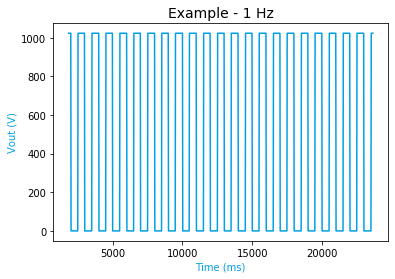

In [2]:
# Example: 1 Hz

import pylab as pl
import matplotlib.pyplot as plt

fname = '../X.Example_Files/A014_data/L3.1-1Hz-115200bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 1 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('Vout (V)', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

2) Modify your experimental setup so that the output waveform amplitude is [0; Vcc/2], and the frequency can be adjusted through a command sent via the serial port (e.g. F5 would produce a 5Hz square wave). Test your setup for different waveform frequencies (in particular 100Hz) and discuss your results.


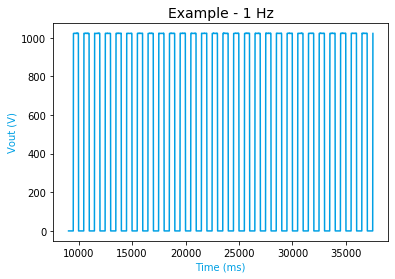

In [4]:
# Example: 1 Hz

import pylab as pl
import matplotlib.pyplot as plt

fname = '../X.Example_Files/A014_data/L3.2-1Hz-115200bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 1 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('Vout (V)', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

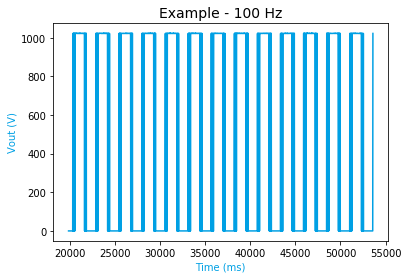

In [6]:
# Example: 1 Hz

import pylab as pl
import matplotlib.pyplot as plt

fname = '../X.Example_Files/A014_data/L3.2-100Hz-115200bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 100 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('Vout (V)', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

3) Devise a 3-bit circuit considering the R-2R resistor ladder network (in the following Figure), and characterize the expected behavior, namely the number of steps, step size, output voltages for each step, and other details that you may find relevant.

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a014/R-2R.png?raw=true" width="600" border="0">
        
<center>R-2R resistor ladder (image by 
<a href="https://en.wikipedia.org/wiki/Resistor_ladder#/media/File:R2r-ladder.png">Lsibilla </a>).</center>

|

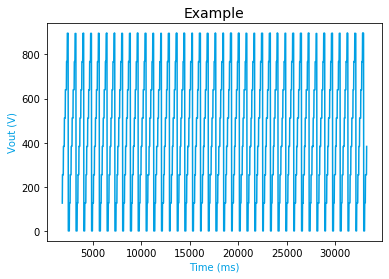

In [8]:
# Example: 1 Hz

import pylab as pl
import matplotlib.pyplot as plt

fname = '../X.Example_Files/A014_data/L3.3.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('Vout (V)', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

4) Using the circuit devised in the previous question, create a firmware that outputs a sawtooth waveform with positive ramp. Present and discuss your experimental findings based on parameters of your choice. The following code is provided as a starting point.


```C

const byte TS = 100;  // Sampling period
const byte a0 = 5;    // LSB in
const byte NBITS = 3; // Number of bits

byte data = 0;        // Output value
byte mask = 1;
byte pin;
byte maxCode = 1;

void setup()
{ 
	Serial.begin(115200);
    for (pin = a0; pin < (a0+NBITS); pin++) {
		pinMode(pin, OUTPUT);
        maxCode *= 2;
    }
}

void loop()
{
    mask = 1;
    pin = a0;
    
    for (mask=001; mask>0; mask<<=1) { // Iterate through bit mask
      if (data & mask) digitalWrite(pin,HIGH);
      else digitalWrite(pin,LOW);
      
      pin++;
      Serial.println(analogRead(A0));
    }
  
    (data == maxCode ? data = 0 : data++);
  
    delay(TS);
  
}
```

## <div style="color:#00a0e4">  2. References </div>

1. https://www.tinkercad.com/dashboard?type=circuits&collection=designs
2. https://www.arduino.cc/reference/tr/language/structure/bitwise-operators/bitwiseand/ 
3. https://www.arduino.cc/reference/tr/language/structure/bitwise-operators/bitshiftleft/  
4. https://en.wikipedia.org/wiki/%3F:#C 

<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IT.png?raw=true" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IST.png?raw=true"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div>  

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. Hugo Plácido da Silva; Joana Pinto```